In [42]:
%load_ext autoreload
%autoreload 2

import glob
import sys
sys.path.insert(0, "../")

from motiflets.competitors import *
from motiflets.plotting import *

import pandas as pd
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
paths = {
    "200GB": "../tests/results/pyattimo_0.7.0_200GB",    
    "20GB": "../tests/results/pyattimo_0.7.0_20GB",
    "8GB": "../tests/results/pyattimo_0.7.0_8GB"
}

df_all = pd.DataFrame()
for name in paths:
    dir_path = paths[name]
    if os.path.isdir(dir_path):
        print(f"Reading from{dir_path}")
        csv_files = glob.glob(os.path.join(dir_path, "*.csv"))
        dfs = [pd.read_csv(file) for file in csv_files]
        
        for key, df in zip(csv_files, dfs):
            df["dataset"] = key.split("_")[4]
        
        df_config = pd.concat(dfs, ignore_index=True)
        df_config["version"] = name
        df_all = pd.concat([df_all, df_config], ignore_index=True)
    else:
        print("Does not exist")
display(df_all.head())

Reading from../tests/results/pyattimo_0.7.0_200GB
Reading from../tests/results/pyattimo_0.7.0_20GB
Reading from../tests/results/pyattimo_0.7.0_8GB


,length,motif length,backend,time in s,memory in MB,extent,motiflet,elbows,dataset,version
0,1288330,8192,pyattimo (delta=0.1),2936.026160,86325.742188,643.473279,[ 743079 684209 79280 656498 45960 9480...,[8],BlackLeggedKittiwake,200GB
1,1288330,4096,pyattimo (delta=0.1),2880.707773,86325.742188,147.976100,[ 853273 329299 744826 47752 81035 11767...,[7],BlackLeggedKittiwake,200GB
2,1288330,2048,pyattimo (delta=0.1),3043.337766,77342.734375,23.884431,[ 756522 1021981 147141 944888 236674 6731...,[8],BlackLeggedKittiwake,200GB
3,1288330,1024,pyattimo (delta=0.1),2570.343203,92146.656250,4.705087,[ 473107 67812 837813 1131630 147170 9449...,[2],BlackLeggedKittiwake,200GB
4,1288330,512,pyattimo (delta=0.1),2811.705647,108587.347656,1.383832,[ 418929 413520 1131522 27591 1197910 10219...,[3 5],BlackLeggedKittiwake,200GB


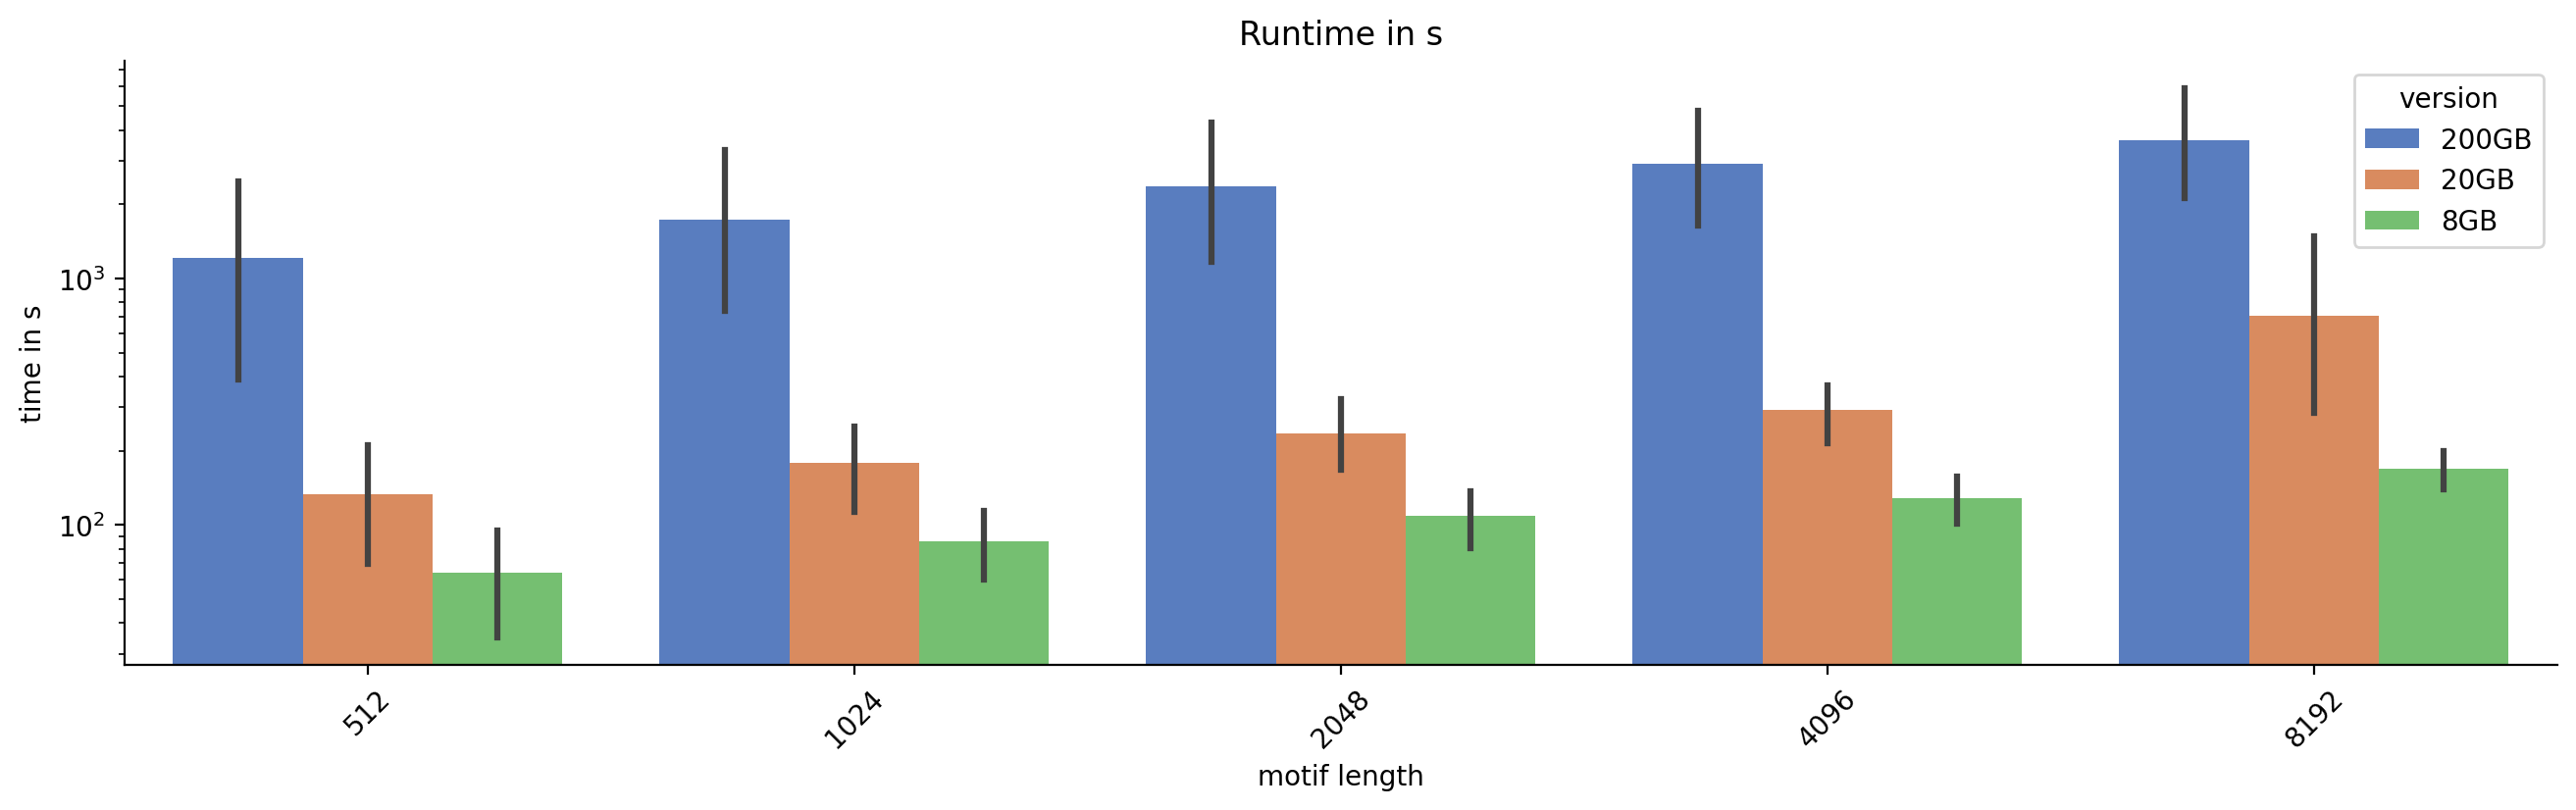

In [44]:
fig, ax = plt.subplots(figsize=(16,4))
ax = sns.barplot(y="time in s", hue="version", x="motif length", data=df_all, palette="muted", ax=ax)
ax.tick_params(axis='x', rotation=45)

sns.despine()
ax.set_title("Runtime in s")
plt.yscale('log')
plt.show()

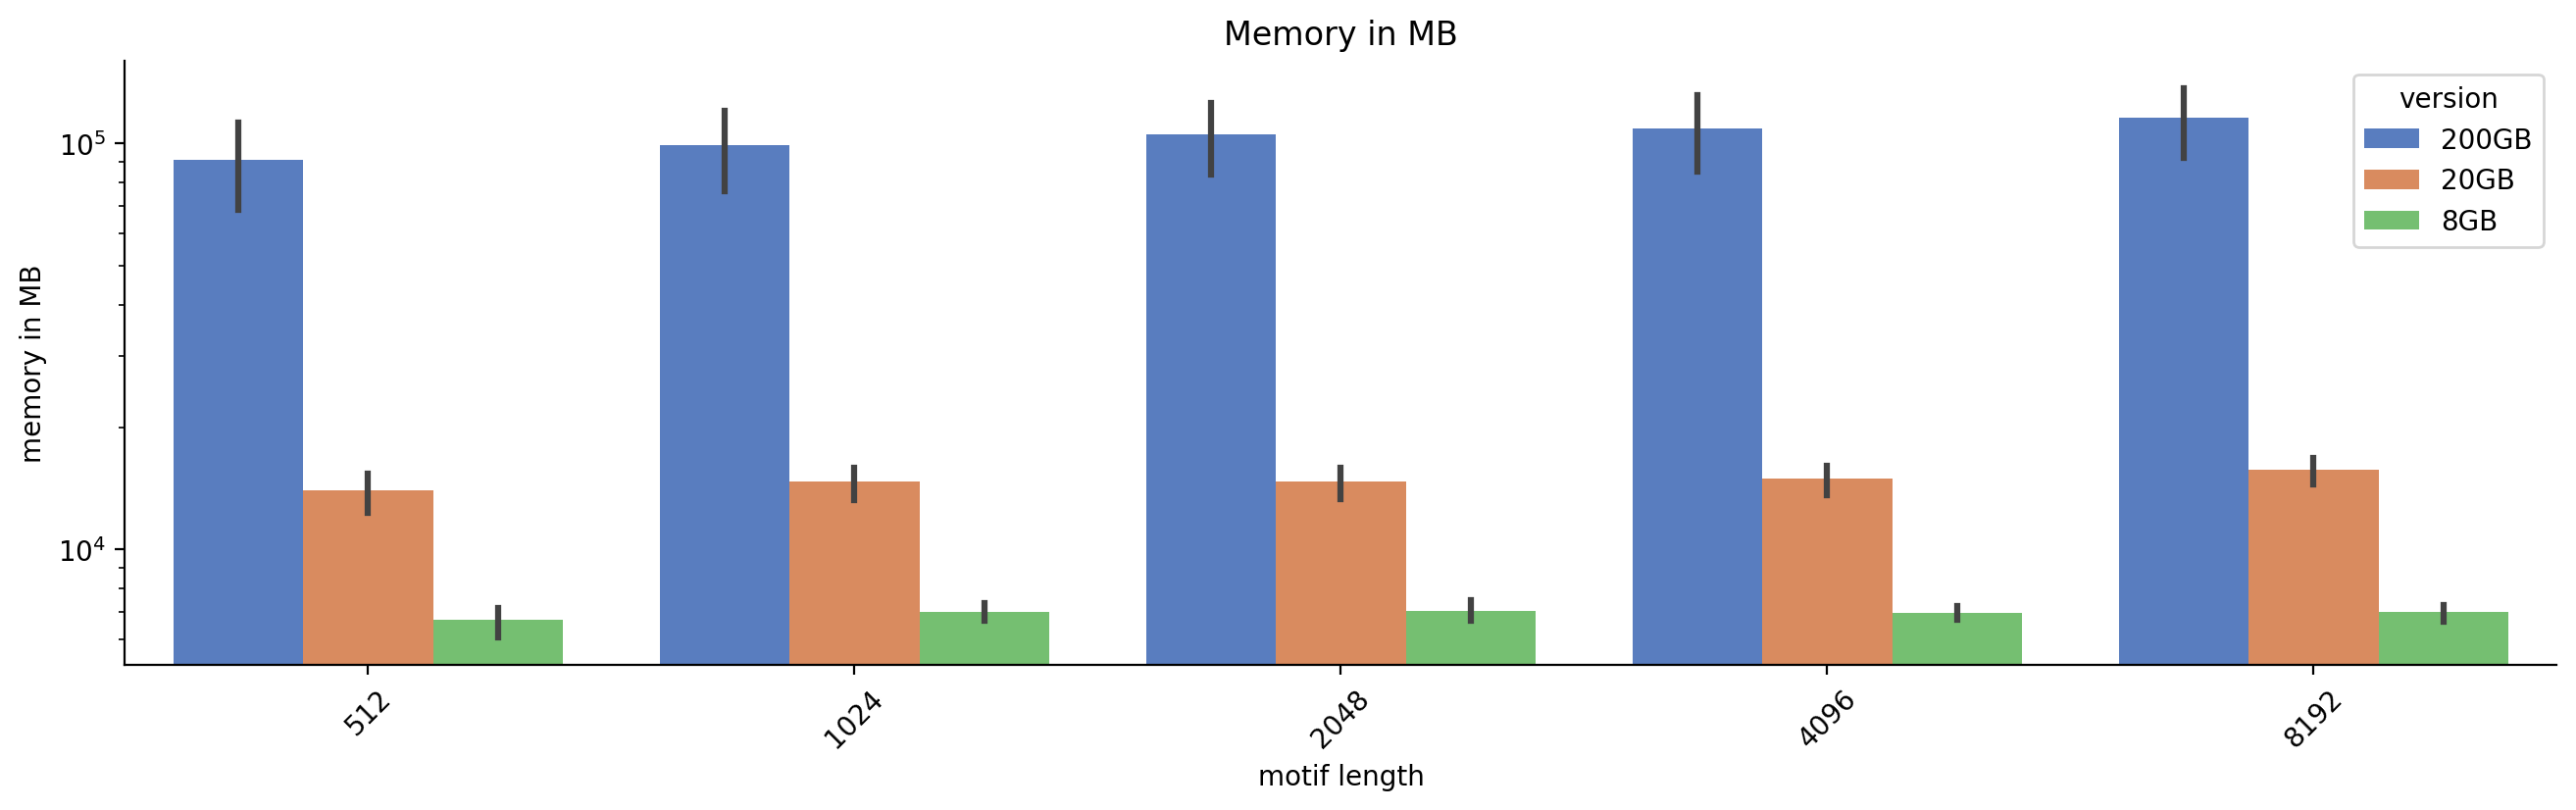

In [45]:
fig, ax = plt.subplots(figsize=(16,4))
ax = sns.barplot(y="memory in MB", hue="version", x="motif length", data=df_all, palette="muted", ax=ax)
ax.tick_params(axis='x', rotation=45)

sns.despine()
ax.set_title("Memory in MB")
plt.yscale('log')
plt.show()

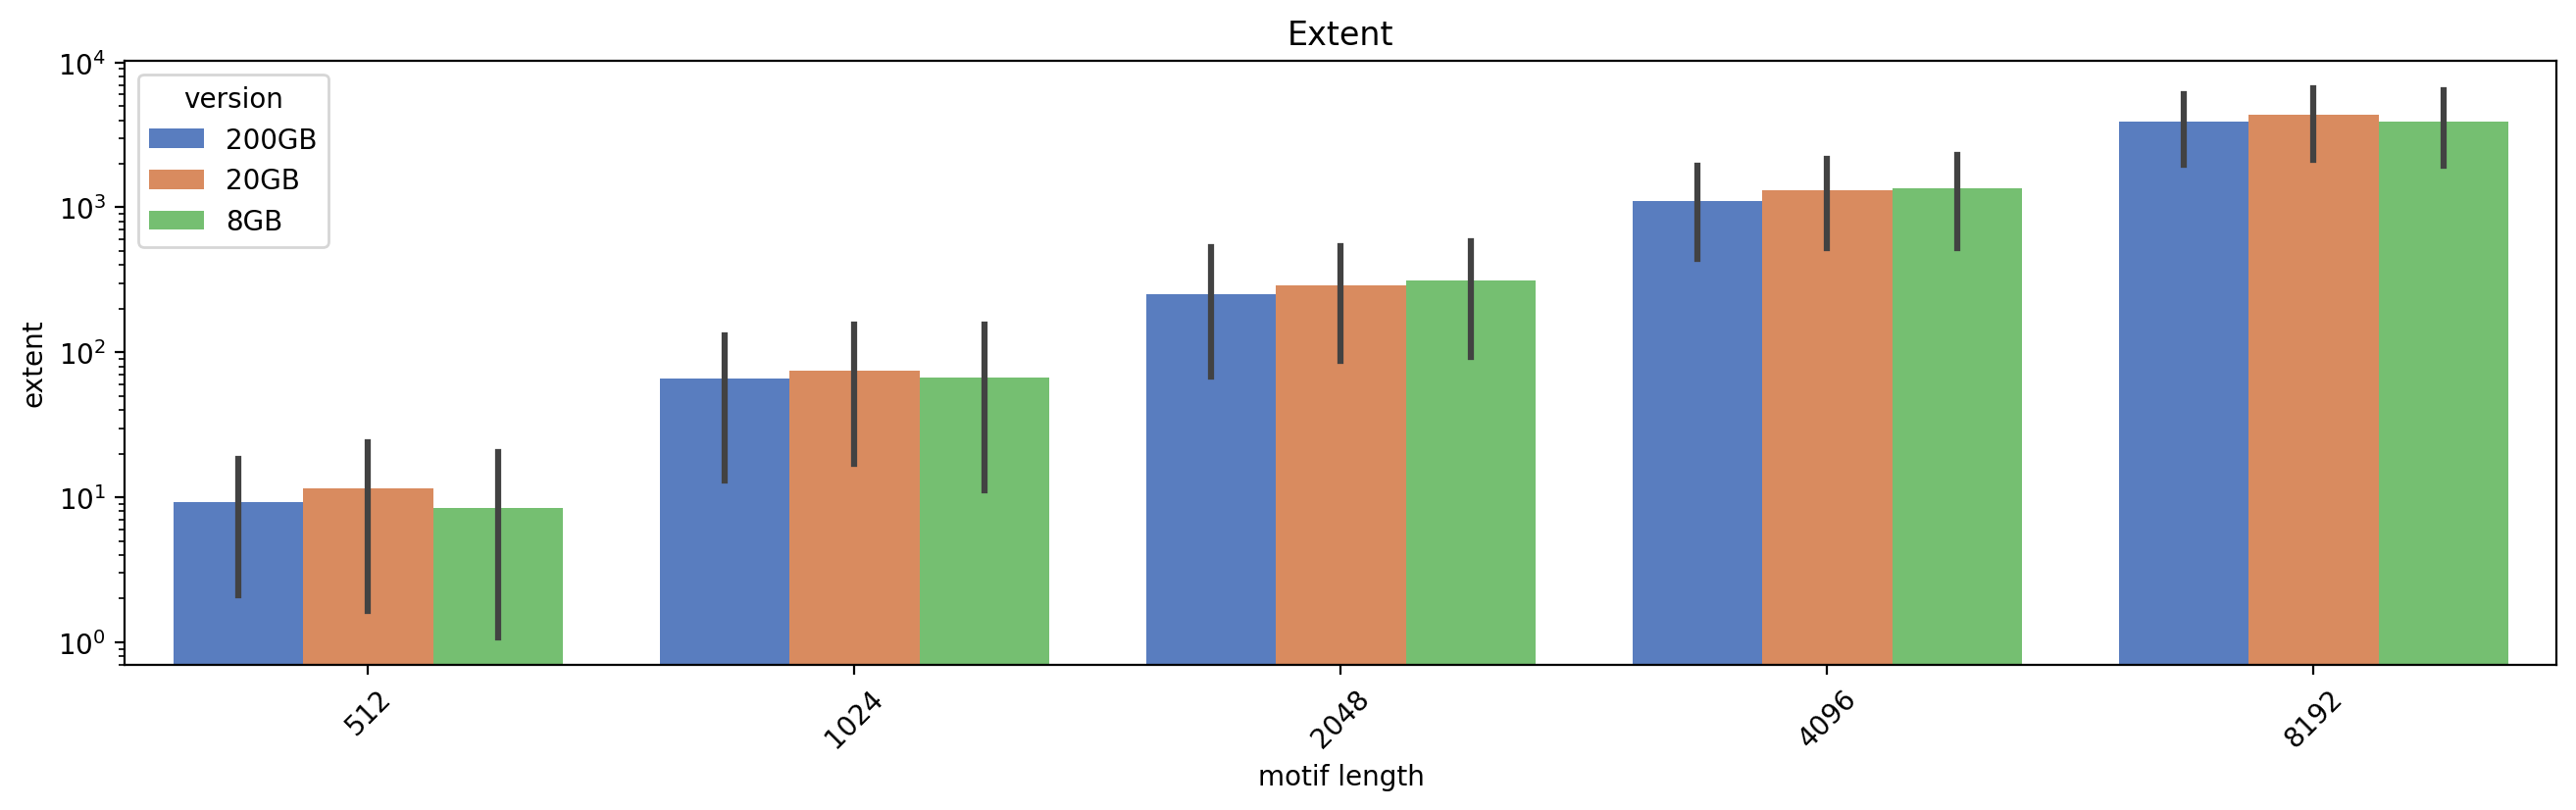

In [46]:
fig, ax = plt.subplots(figsize=(16,4))
ax = sns.barplot(y="extent", hue="version", x="motif length", data=df_all, palette="muted", ax=ax)
ax.tick_params(axis='x', rotation=45)

ax.set_title("Extent")
plt.yscale('log')
plt.show()